In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sbn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


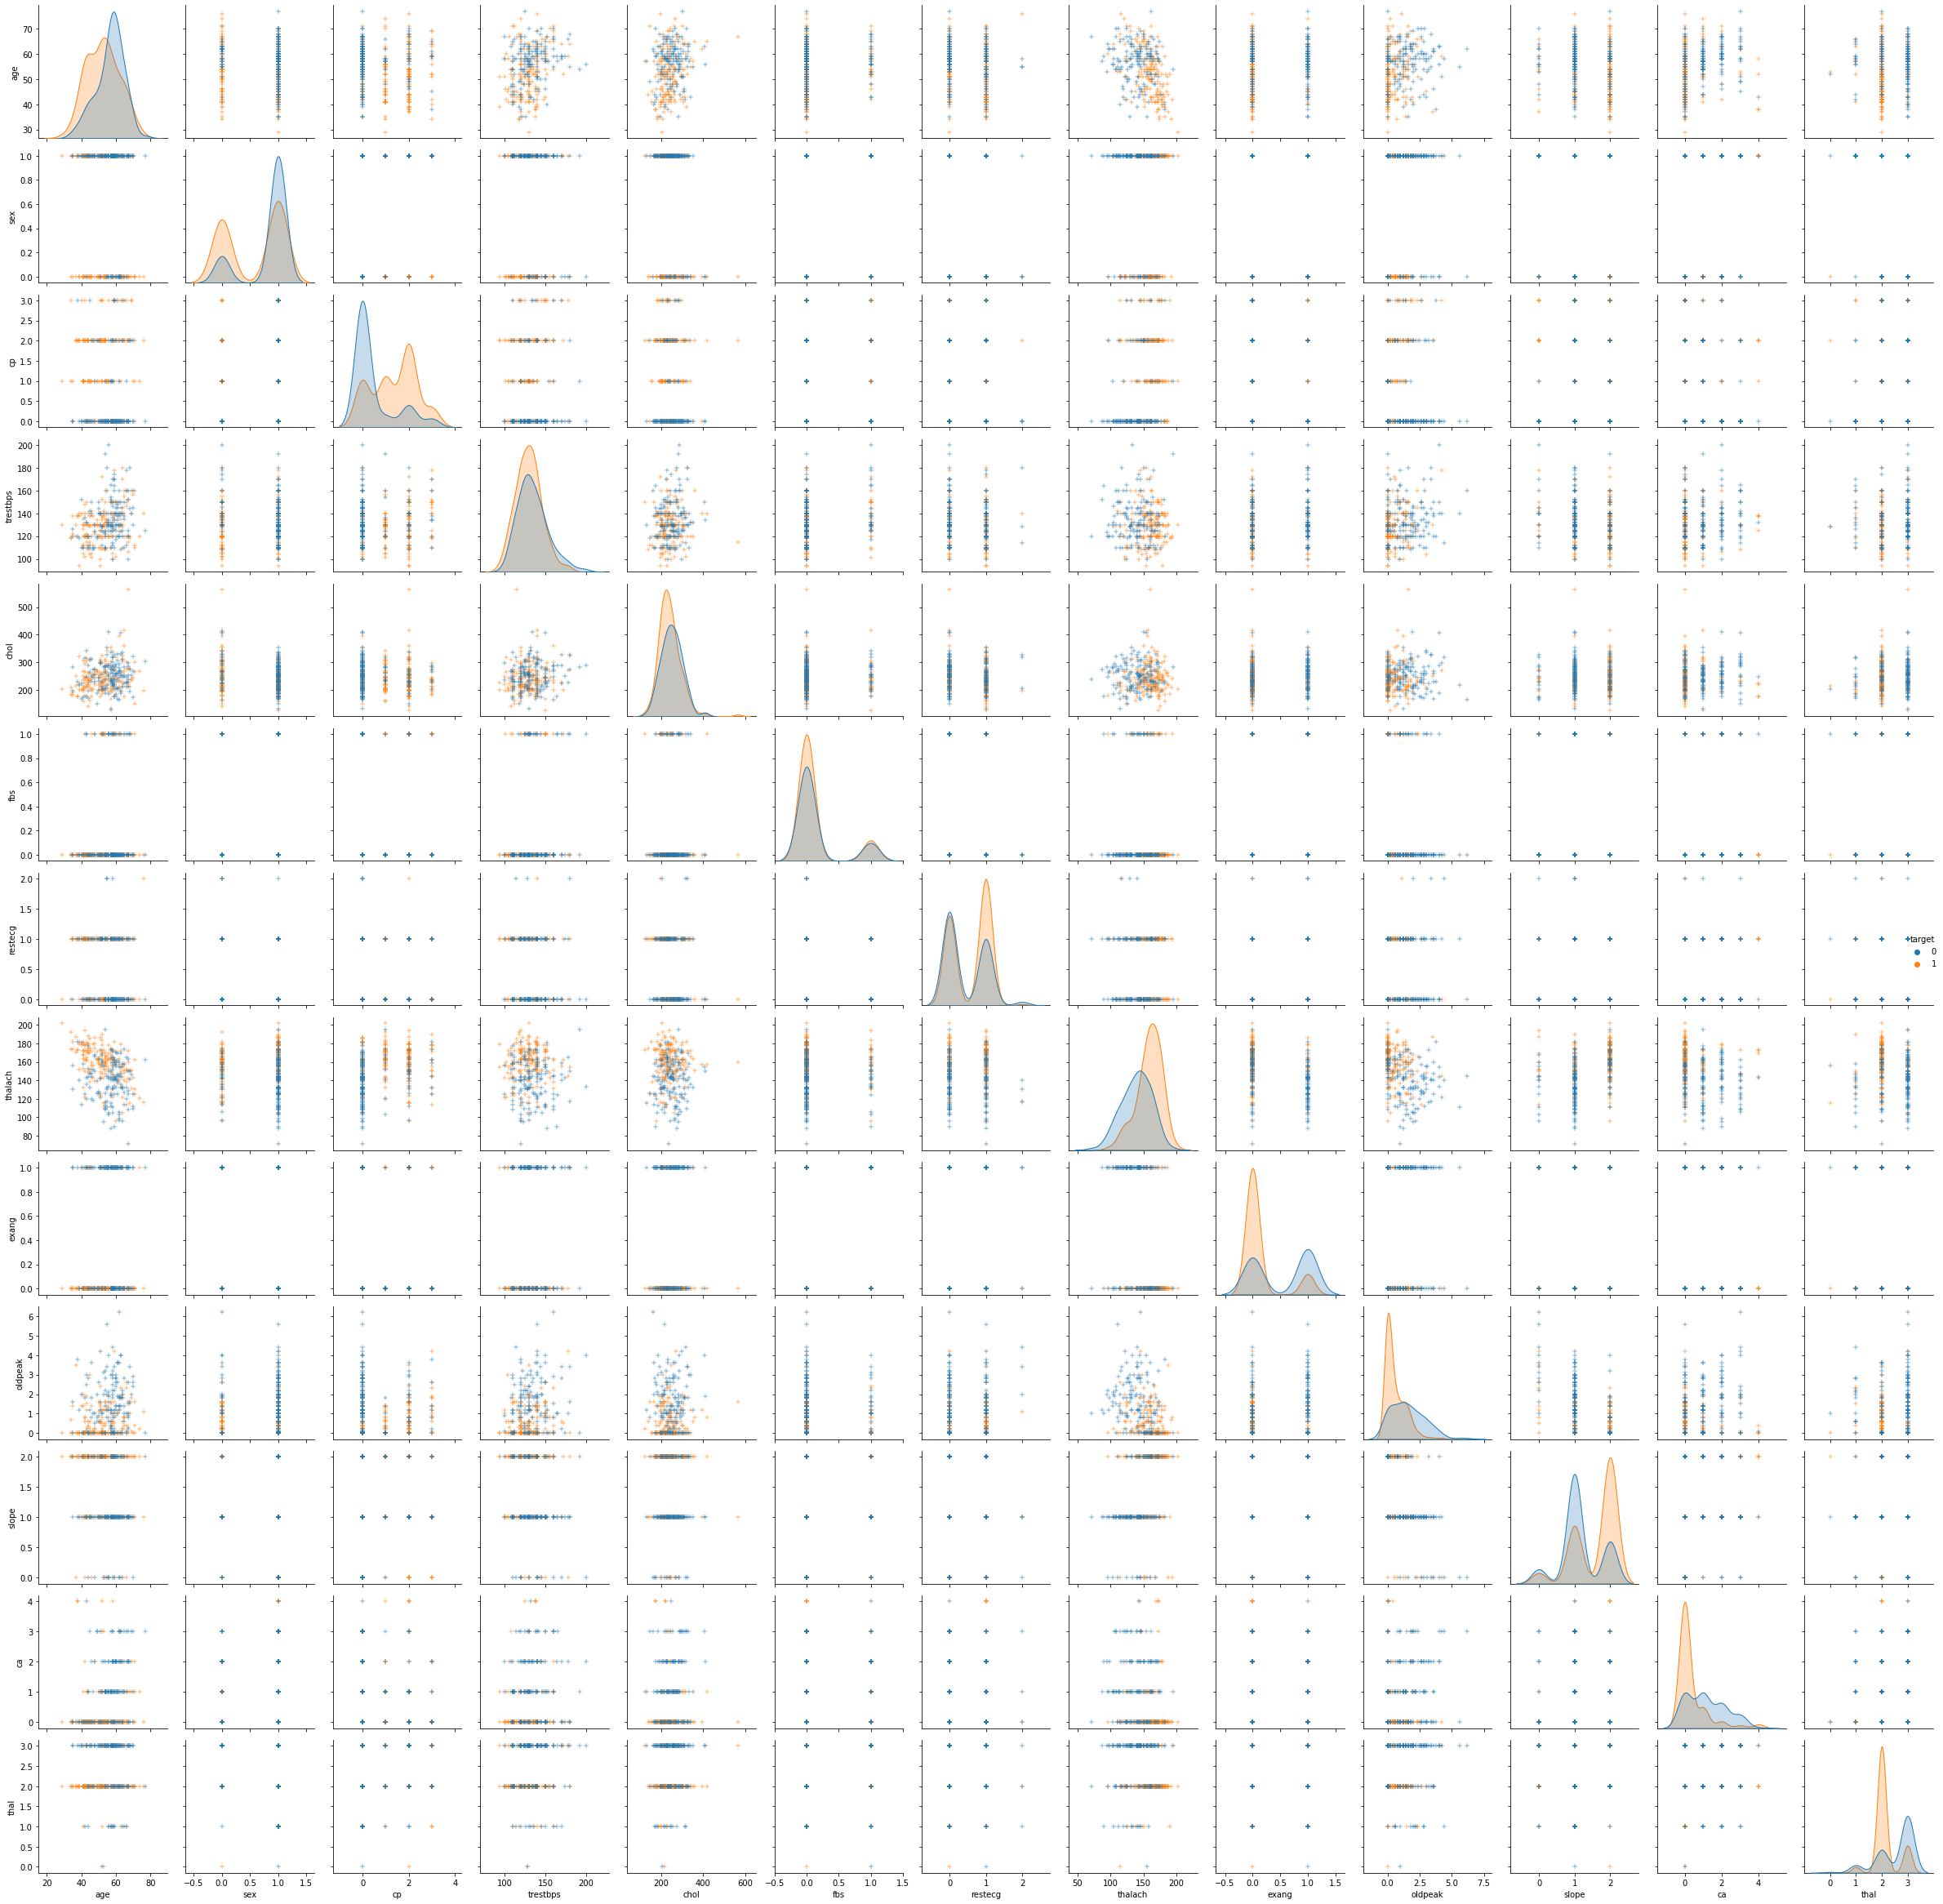

In [6]:
sbn.pairplot(data, hue='target', markers='+')
plt.tight_layout()

In [7]:
data_target = data.groupby("target").size()

In [8]:
data_target

target
0    138
1    165
dtype: int64

0 --> doesn't suffer from heart diseases, 
1 --> suffer from heart diseases

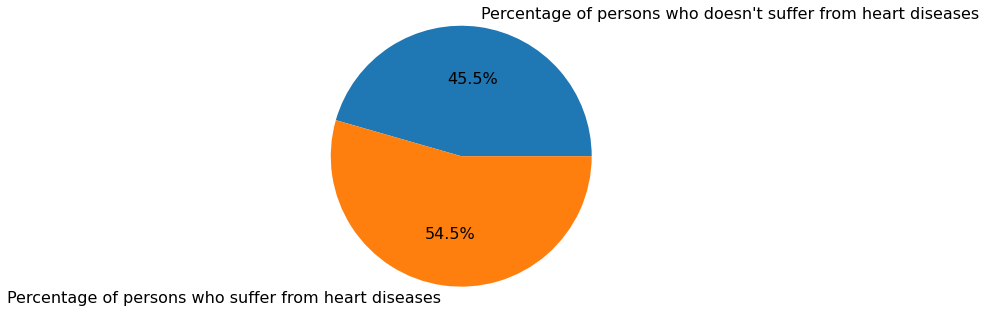

In [9]:
plt.pie(data_target.values, labels = ["Percentage of persons who doesn't suffer from heart diseases ", "Percentage of persons who suffer from heart diseases"] , autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [10]:
data_sex = data.groupby(["sex","target"]).size()
print(data_sex)

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64


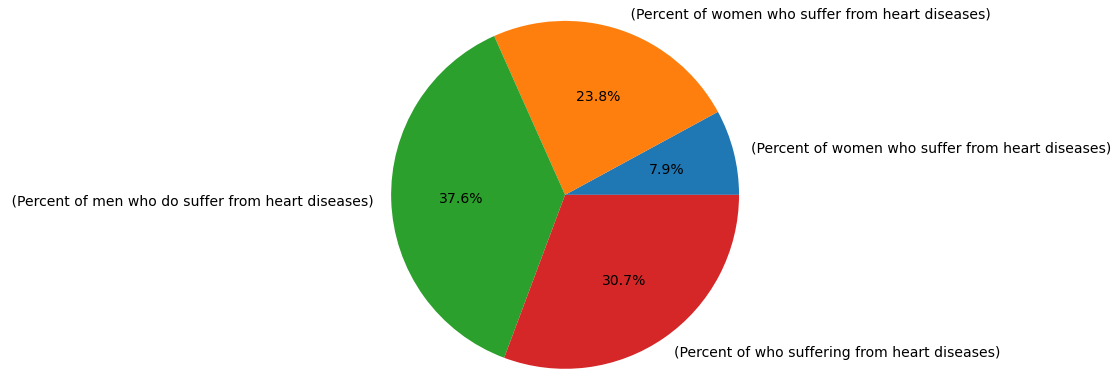

In [11]:
plt.pie(data_sex.values, labels = ["(Percent of women who suffer from heart diseases)", " (Percent of women who suffer from heart diseases)", " (Percent of men who do suffer from heart diseases)", "(Percent of who suffering from heart diseases)"],autopct='%1.1f%%',radius = 2, textprops = {"fontsize" : 14})
plt.show()

In [12]:
data_age = data.groupby(["age", "target"]).size(). head(60)

In [13]:
data_age

age  target
29   1          1
34   1          2
35   0          2
     1          2
37   1          2
38   0          1
     1          2
39   0          1
     1          3
40   0          2
     1          1
41   0          1
     1          9
42   0          1
     1          7
43   0          3
     1          5
44   0          3
     1          8
45   0          2
     1          6
46   0          3
     1          4
47   0          2
     1          3
48   0          3
     1          4
49   0          2
     1          3
50   0          3
     1          4
51   0          3
     1          9
52   0          4
     1          9
53   0          2
     1          6
54   0          6
     1         10
55   0          5
     1          3
56   0          6
     1          5
57   0         10
     1          7
58   0         12
     1          7
59   0          9
     1          5
60   0          8
     1          3
61   0          7
     1          1
62   0          7
     1          

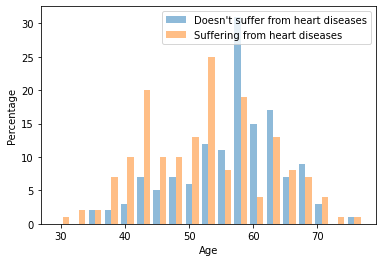

In [14]:
plt.hist([data[data.target==0].age, data[data.target==1].age], bins = 19, alpha =0.5,  align='mid',histtype = "bar", orientation='vertical',  label = ["Doesn't suffer from heart diseases","Suffering from heart diseases"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='chol'>

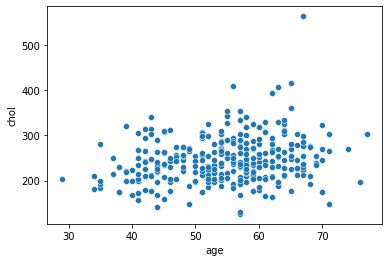

In [16]:
sbn.scatterplot(x = "age", y = "chol", data=data)

In [17]:
x = data.iloc[:,0:13]

In [18]:
y = data.iloc[:,-1].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8, metric = "minkowski")
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)

In [22]:
cm

array([[23,  4],
       [ 5, 29]])

In [23]:
accuracy_score_knn = accuracy_score(y_pred1, y_test)

In [24]:
accuracy_score_knn

0.8524590163934426

In [25]:
from sklearn.naive_bayes import BernoulliNB
bn = BernoulliNB()
bn.fit(X_train, y_train)
y_pred2 = bn.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)

In [26]:
cm

array([[23,  4],
       [ 4, 30]])

In [27]:
accuracy_score_bn = accuracy_score(y_pred2, y_test)

In [28]:
accuracy_score_bn

0.8688524590163934

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)
y_pred3 = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)


In [30]:
cm

array([[23,  4],
       [ 8, 26]])

In [31]:
accuracy_score_dtc = accuracy_score(y_pred3, y_test)

In [32]:
accuracy_score_dtc

0.8032786885245902

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11, criterion = "entropy")
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)

In [34]:
cm

array([[24,  3],
       [ 5, 29]])

In [35]:
accuracy_score_rfc = accuracy_score(y_pred4, y_test)

In [36]:
accuracy_score_rfc

0.8688524590163934

In [37]:
models = [accuracy_score_knn, accuracy_score_bn, accuracy_score_dtc, accuracy_score_rfc]
accuracy_scores = []
for model in models:
    accuracy_scores.append(model)
print(accuracy_scores)    

[0.8524590163934426, 0.8688524590163934, 0.8032786885245902, 0.8688524590163934]


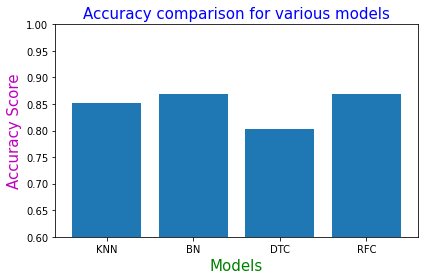

In [38]:
plt.bar(['KNN', 'BN', 'DTC', 'RFC'], accuracy_scores)
plt.ylim(0.6,1.0)
plt.title('Accuracy comparison for various models', fontsize=15, color='b')
plt.xlabel('Models', fontsize=15, color='g')
plt.ylabel('Accuracy Score', fontsize=15, color='m')
plt.tight_layout()
plt.show()